In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('linearX.csv', header=None).values.flatten()
y = pd.read_csv('linearY.csv', header=None).values.flatten()

In [4]:
X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std

X_with_bias = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, lr, iterations, tolerance=1e-6):
    m = len(y)
    costs = []
    for i in range(iterations):
        predictions = X @ theta
        gradient = (1 / m) * (X.T @ (predictions - y))
        theta -= lr * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        if i > 0 and abs(costs[-2] - costs[-1]) < tolerance:
            print(f"Converged at iteration {i} with cost {cost:.6f}")
            break
    return theta, costs

Converged at iteration 10 with cost 0.000001
Final theta values (after convergence): [0.99613347 0.00133954]
Final cost (after convergence): 1.313194845507832e-06


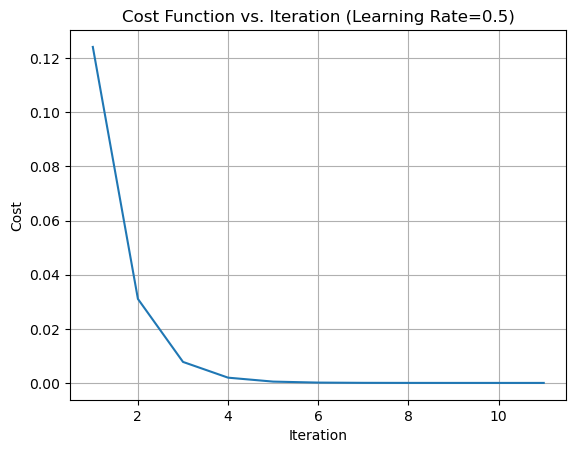

In [6]:
initial_theta = np.zeros(X_with_bias.shape[1])
learning_rate = 0.5
max_iterations = 1000

theta_final, costs = gradient_descent(X_with_bias, y, initial_theta, learning_rate, max_iterations)

print("Final theta values (after convergence):", theta_final)
print("Final cost (after convergence):", costs[-1])

plt.plot(range(1, len(costs[:50]) + 1), costs[:50])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iteration (Learning Rate=0.5)")
plt.grid(True)
plt.show()

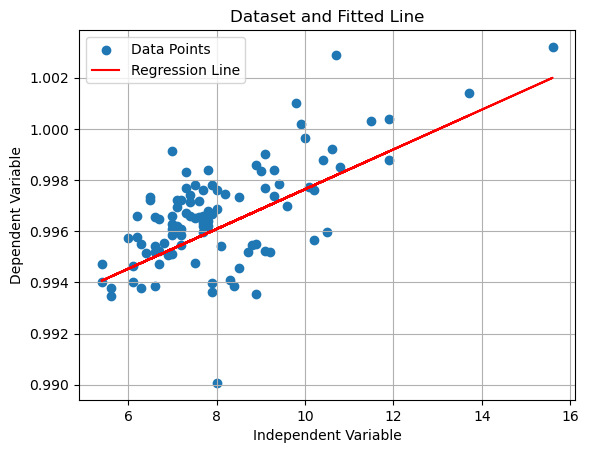

In [7]:
plt.scatter(X, y, label="Data Points")
y_pred = X_with_bias @ theta_final
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Dataset and Fitted Line")
plt.legend()
plt.grid(True)
plt.show()

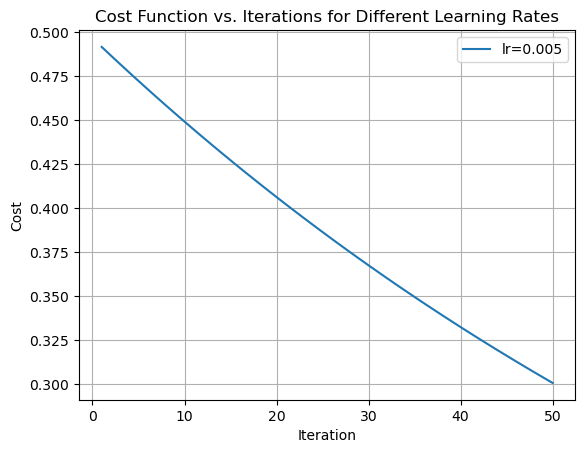

Converged at iteration 10 with cost 0.000001


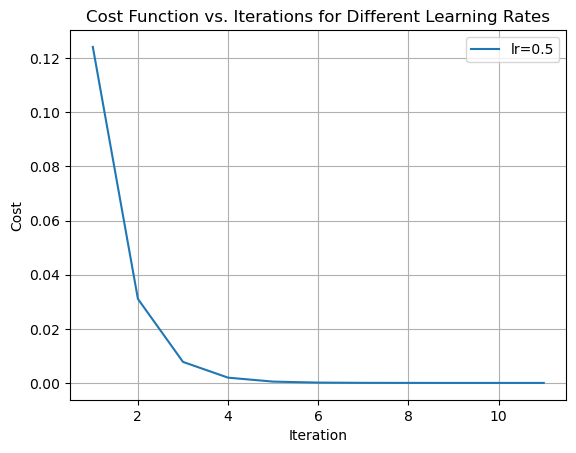

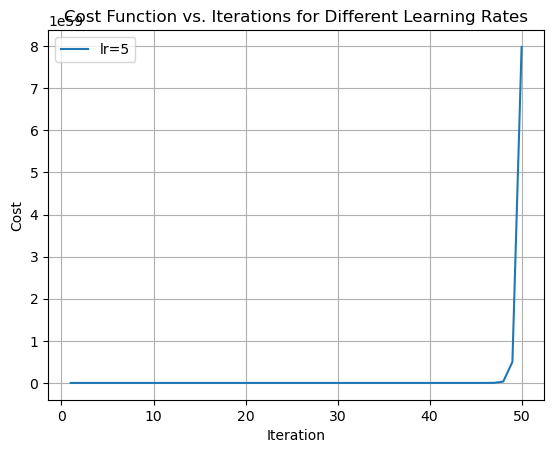

In [8]:
learning_rates = [0.005]
for lr in learning_rates:
    theta, costs_lr = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), lr, 50)
    plt.plot(range(1, len(costs_lr) + 1), costs_lr, label=f"lr={lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

learning_rates = [0.5]
for lr in learning_rates:
    theta, costs_lr = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), lr, 50)
    plt.plot(range(1, len(costs_lr) + 1), costs_lr, label=f"lr={lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()
learning_rates = [5]
for lr in learning_rates:
    theta, costs_lr = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), lr, 50)
    plt.plot(range(1, len(costs_lr) + 1), costs_lr, label=f"lr={lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
def stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations):
    costs = []
    m = len(y)
    
    for _ in range(num_iterations):
        cost = 0
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index + 1]
            y_i = y[random_index:random_index + 1]
            predictions = X_i @ theta
            errors = predictions - y_i
            gradients = X_i.T @ errors
            theta -= learning_rate * gradients
            cost += (1 / (2 * m)) * np.sum(errors ** 2)
        costs.append(cost)
    
    return theta, costs
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size):
    costs = []
    m = len(y)
    
    for _ in range(num_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            predictions = X_batch @ theta
            errors = predictions - y_batch
            gradients = (1 / len(y_batch)) * (X_batch.T @ errors)
            theta -= learning_rate * gradients
        
        cost = (1 / (2 * m)) * np.sum((X @ theta - y) ** 2)
        costs.append(cost)
    
    return theta, costs


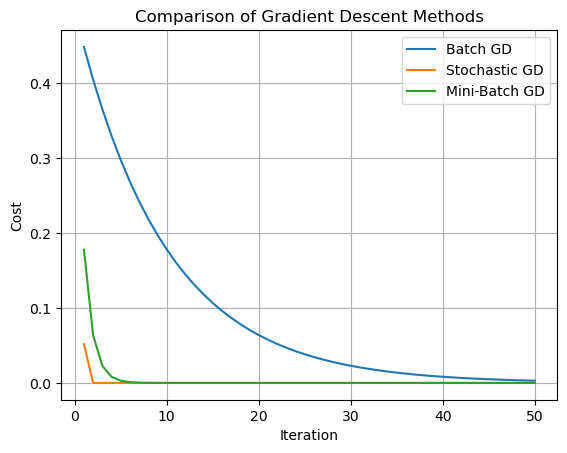

In [12]:
chosen_lr = 0.05
theta_batch, costs_batch = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), chosen_lr, 50)
theta_stoch, costs_stoch = stochastic_gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), chosen_lr, 50)
theta_mini, costs_mini = mini_batch_gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), chosen_lr, 50, batch_size=10)

plt.plot(range(1, len(costs_batch) + 1), costs_batch, label="Batch GD")
plt.plot(range(1, len(costs_stoch) + 1), costs_stoch, label="Stochastic GD")
plt.plot(range(1, len(costs_mini) + 1), costs_mini, label="Mini-Batch GD")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Comparison of Gradient Descent Methods")
plt.legend()
plt.grid(True)
plt.show()
